In [53]:
import requests
import json
import prettytable
import pprint
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pandas as pd
import numpy as np
import time

In [54]:
#pip install prettytable

In [55]:
# headers = {'Content-type': 'application/json'}
# data = json.dumps({"seriesid": ['LNS14000000','CUUR0000SA0','CES0000000001','LNS14000006','CUSR0000SA0','LNS11300000','CUUR0000SA0L1E','CES3000000001','CES0500000003','LNU04000000','PCU327320327320','PCU33312033312014','LNS12000000','CUSR0000SA0L1E','CUUR0000SAM1','CUUR0000SEMC01','LNS12300000','LNS12035019','CUUR0000SEMC','CUUR0000SS5702','CUUR0000SS5703','CUUR0000SEMC02','CES0500000001','CUUR0100SEMC','CUUR0100SAM1'],"startyear":"2011", "endyear":"2014"})
# p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
# json_data = json.loads(p.text)

# pp = pprint.PrettyPrinter(indent=4)
# pp.pprint(json_data)

In [56]:
# test = [{"seriesID":"LNS14000000"},
# {"seriesID":"CUUR0000SA0"},
# {"seriesID":"CES0000000001"},
# {"seriesID":"LNS14000006"},
# {"seriesID":"CUSR0000SA0"},
# {"seriesID":"LNS11300000"},
# {"seriesID":"CUUR0000SA0L1E"},
# {"seriesID":"CES3000000001"},
# {"seriesID":"CES0500000003"},
# {"seriesID":"LNU04000000"},
# {"seriesID":"PCU327320327320"},
# {"seriesID":"PCU33312033312014"},
# {"seriesID":"LNS12000000"},
# {"seriesID":"CUSR0000SA0L1E"},
# {"seriesID":"CUUR0000SAM1"},
# {"seriesID":"CUUR0000SEMC01"},
# {"seriesID":"LNS12300000"},
# {"seriesID":"LNS12035019"},
# {"seriesID":"CUUR0000SEMC"},
# {"seriesID":"CUUR0000SS5702"},
# {"seriesID":"CUUR0000SS5703"},
# {"seriesID":"CUUR0000SEMC02"},
# {"seriesID":"CES0500000001"},
# {"seriesID":"CUUR0100SEMC"},
# {"seriesID":"CUUR0100SAM1"}]
# str = ''
# for sers in test:
#     str+= sers.get('seriesID') + "','"

In [57]:
#state_data = pd.read_excel("../Resources/State_M2018_dl.xlsx")
state_data = pd.read_csv("../Resources/BLS_state_M2018_dl.csv")

state_data.head()

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,AL,Alabama,00-0000,All Occupations,total,"1,943,760",0.4,1000.000,1.00,...,16.22,25.63,38.28,"18,030","22,400","33,740","53,310","79,630",NaN,NaN
1,1,AL,Alabama,11-0000,Management Occupations,major,"73,860",1.1,38.001,0.72,...,46.01,63.87,90.06,"48,650","68,030","95,710","132,860","187,330",NaN,NaN
2,1,AL,Alabama,11-1011,Chief Executives,detailed,"1,390",5.6,0.716,0.53,...,91.31,#,#,"79,530","125,570","189,920",#,#,NaN,NaN
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,"28,600",1.8,14.712,0.93,...,48.55,70.79,#,"50,180","68,990","100,980","147,250",#,NaN,NaN
4,1,AL,Alabama,11-1031,Legislators,detailed,970,6.4,0.498,1.43,...,*,*,*,"16,310","17,390","19,210","32,290","63,390",True,NaN


In [58]:
state_region_map = pd.read_csv("../Resources/us_census_bureau_regions_and_divisions.csv")
state_region_map.head(20)


,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [59]:
state_region_data = state_data.merge(state_region_map, how="left", left_on="ST", right_on="State Code")
state_region_data.head()

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY,State,State Code,Region,Division
0,1,AL,Alabama,00-0000,All Occupations,total,"1,943,760",0.4,1000.000,1.00,...,"22,400","33,740","53,310","79,630",NaN,NaN,Alabama,AL,South,East South Central
1,1,AL,Alabama,11-0000,Management Occupations,major,"73,860",1.1,38.001,0.72,...,"68,030","95,710","132,860","187,330",NaN,NaN,Alabama,AL,South,East South Central
2,1,AL,Alabama,11-1011,Chief Executives,detailed,"1,390",5.6,0.716,0.53,...,"125,570","189,920",#,#,NaN,NaN,Alabama,AL,South,East South Central
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,"28,600",1.8,14.712,0.93,...,"68,990","100,980","147,250",#,NaN,NaN,Alabama,AL,South,East South Central
4,1,AL,Alabama,11-1031,Legislators,detailed,970,6.4,0.498,1.43,...,"17,390","19,210","32,290","63,390",True,NaN,Alabama,AL,South,East South Central


In [60]:
state_region_data_major = state_region_data[state_region_data["OCC_GROUP"] == "major"]
state_region_data_major['TOT_EMP'].replace(to_replace=',', value='', regex=True, inplace=True)
state_region_data_major = state_region_data_major.astype({'TOT_EMP': 'int32'})
state_region_data_major.head()


,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY,State,State Code,Region,Division
1,1,AL,Alabama,11-0000,Management Occupations,major,73860,1.1,38.001,0.72,...,"68,030","95,710","132,860","187,330",NaN,NaN,Alabama,AL,South,East South Central
34,1,AL,Alabama,13-0000,Business and Financial Operations Occupations,major,74370,1.2,38.262,0.72,...,"47,740","64,830","87,920","112,520",NaN,NaN,Alabama,AL,South,East South Central
63,1,AL,Alabama,15-0000,Computer and Mathematical Occupations,major,41560,2.2,21.381,0.71,...,"57,270","79,020","105,330","133,720",NaN,NaN,Alabama,AL,South,East South Central
80,1,AL,Alabama,17-0000,Architecture and Engineering Occupations,major,43510,1.7,22.386,1.27,...,"59,260","82,700","112,980","140,290",NaN,NaN,Alabama,AL,South,East South Central
114,1,AL,Alabama,19-0000,"Life, Physical, and Social Science Occupations",major,8560,2.1,4.403,0.54,...,"43,150","56,130","77,330","106,810",NaN,NaN,Alabama,AL,South,East South Central


In [61]:
region_data_major_group = state_region_data_major.groupby(['Region', 'OCC_TITLE'])

In [62]:
region_data_major = region_data_major_group['TOT_EMP'].sum()
region_data_major = pd.DataFrame(region_data_major)

print(region_data_major.head())
region_data_major = region_data_major.reset_index()

                                                            TOT_EMP
Region  OCC_TITLE                                                  
Midwest Architecture and Engineering Occupations             590470
        Arts, Design, Entertainment, Sports, and Media ...   386630
        Building and Grounds Cleaning and Maintenance O...   934020
        Business and Financial Operations Occupations       1617950
        Community and Social Service Occupations             469790


In [86]:
#region_data_major = region_data_major.reset_index()
region_data_major.Region.unique()
#region_data_major.head()

major_regions = region_data_major.pivot(index='OCC_TITLE', columns='Region', values='TOT_EMP')
major_regions.head()


Region,Midwest,Northeast,South,West
OCC_TITLE,,,,
Architecture and Engineering Occupations,590470,416160,876680,672920
"Arts, Design, Entertainment, Sports, and Media Occupations",386630,417820,608290,538460
Building and Grounds Cleaning and Maintenance Occupations,934020,837490,1613610,1036850
Business and Financial Operations Occupations,1617950,1485040,2689820,1928470
Community and Social Service Occupations,469790,525660,635950,540440


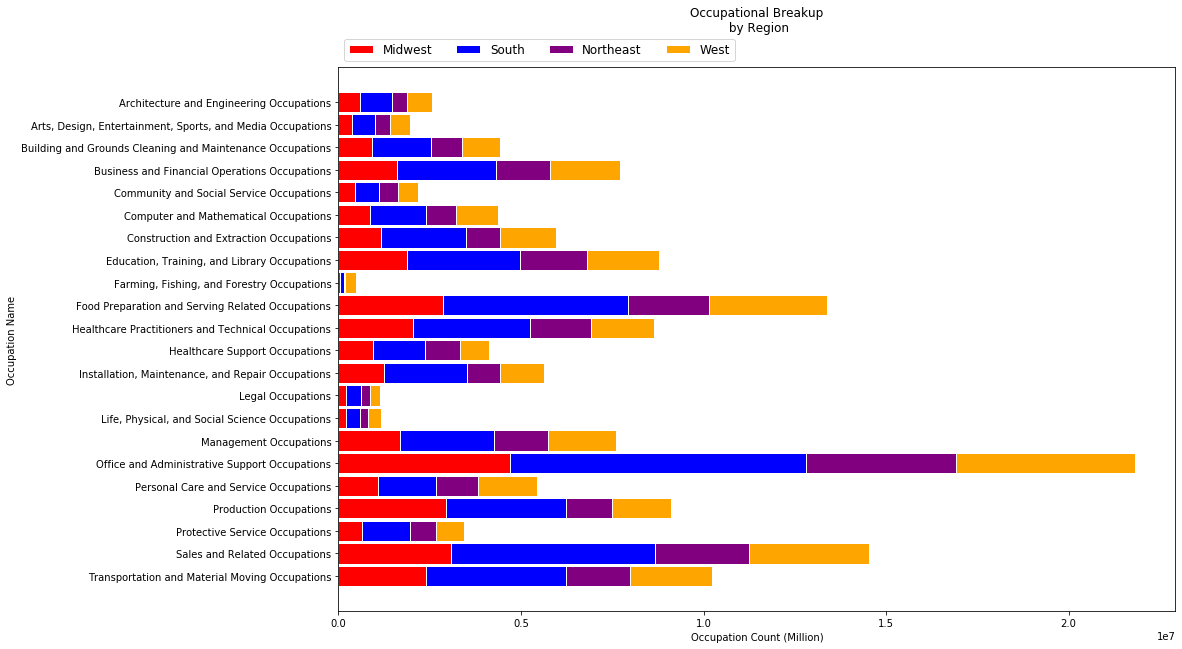

In [82]:
barWidth = 1
names= major_regions.index.tolist() 

# Create graph bars
r = np.arange(len(names))

fig, ax = plt.subplots(figsize=(15,10))
font_prop = font_manager.FontProperties(size=9)

# Create graph bars for regions
ax.barh(names, major_regions.Midwest, height=0.9, label='Midwest',  color='red', edgecolor='white')
xcenters = major_regions.Midwest / 2

ax.barh(names, major_regions.South, left=major_regions.Midwest, height=0.9, label='South', color='blue', edgecolor='white')
xcenters = major_regions.Midwest + (major_regions.South / 2)

ax.barh(names, major_regions.Northeast, left= (major_regions.Midwest + major_regions.South), height=0.9, label='Northeast', color='purple', edgecolor='white')
xcenters = major_regions.Midwest + major_regions.South + (major_regions.Northeast / 2)

ax.barh(names, major_regions.West, left= (major_regions.Midwest + major_regions.South + major_regions.Northeast), height=0.9, label='West', color='orange', edgecolor='white')
xcenters = major_regions.Midwest + major_regions.South + major_regions.Northeast + (major_regions.Northeast / 2)

# labels read top-to-bottom
ax.invert_yaxis()  

#Label the axis and legend
ax.set_xlabel('Occupation Count (Million)')
ax.set_ylabel('Occupation Name')
ax.set_title('Occupational Breakup\n by Region\n\n')
ax.legend(ncol=4, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')

#Save to file
plt.savefig("../output_charts/Occupation_Breakup_Region.png")

# Show graphic
plt.show()